<a href="https://colab.research.google.com/github/soaresWT/MachineLearning01/blob/main/MLTrabalho01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tripla:

**Franciel Silveira Penha De Vasconcelos - 510919**

 **Francisco Victor Soares de Lima - 509712**

 **Yagho Miguel da Silva - 539560**

# Descrição do Trabalho caso o Moodle caia

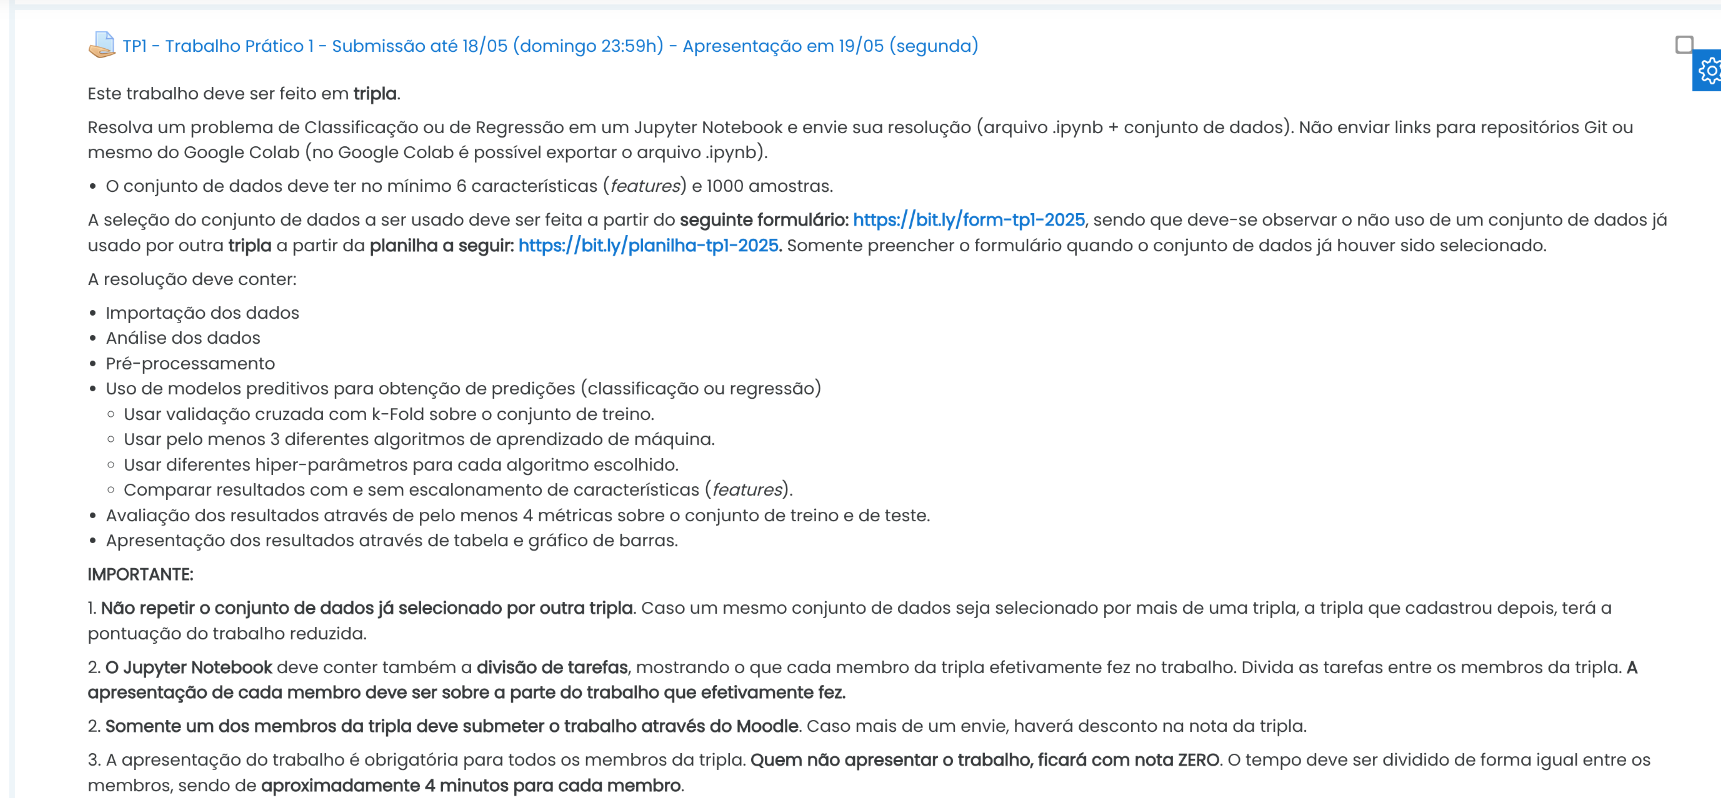

# Visão geral do dataset (Franciel)

O dataset escolhido para o trabalho se chama **"Mushroom"**, e está disponível no [UCI Machine Learning](https://archive.ics.uci.edu/dataset/73/mushroom).

O objetivo deste trabalho é resolver um problema de **classificação**: prever se um cogumelo é **comestível (edible)** ou **venenoso (poisonous)** com base em suas características observáveis.

Este é um problema de **classificação supervisionada**. Nossa variável **target** (`poisonosous`) assume dois valores:
- `e`: comestível (*edible*)
- `p`: venenoso (*poisonous*)



---


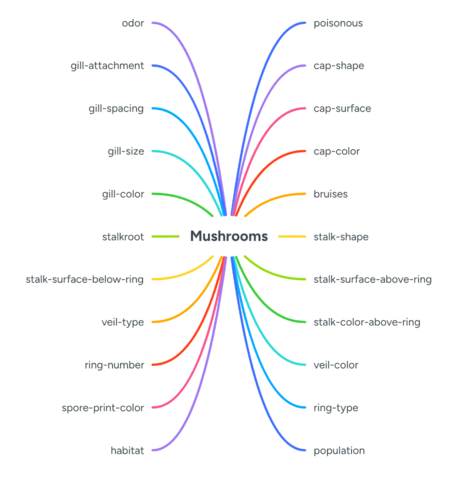



---



# Importação dos dados

In [ ]:
!pip3 install -U ucimlrepo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import  StratifiedShuffleSplit, train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
mushroom = fetch_ucirepo(id=73)

# data (as pandas dataframes)
X = mushroom.data.features
y = mushroom.data.targets

# metadata
print(mushroom.metadata)

# variable information
print(mushroom.variables)

{'uci_id': 73, 'name': 'Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/73/mushroom', 'data_url': 'https://archive.ics.uci.edu/static/public/73/data.csv', 'abstract': 'From Audobon Society Field Guide; mushrooms described in terms of physical characteristics; classification: poisonous or edible', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 8124, 'num_features': 22, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['poisonous'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1981, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5959T', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525).  Each species is identified as definitely edible, definitely po

In [ ]:
#Possíveis atribuições para cada feature
for index, row in mushroom.variables.iterrows():
    print(f"{row['name']}: {row['description']}")

poisonous: None
cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
bruises: bruises=t,no=f
odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
gill-attachment: attached=a,descending=d,free=f,notched=n
gill-spacing: close=c,crowded=w,distant=d
gill-size: broad=b,narrow=n
gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
stalk-shape: enlarging=e,tapering=t
stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
ve

# Análise dos dados (Franciel)


### Entendendo a estrutura dos dados

In [ ]:
#Concatenar features e alvo para exibição conjunta
df = pd.concat([X, y], axis=1)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises                   8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-root                5644 non-null   object
 11  stalk-surface-above-ring  8124 non-null   object
 12  stalk-surface-below-ring  8124 non-null   object
 13  stalk-color-above-ring    8124 non-null   object
 14  stalk-color-below-ring  

### Verificando o target no DataFrame


In [ ]:
print(df.columns)

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'poisonous'],
      dtype='object')


Neste caso a coluna target é 'poisonous', nossa variável dependente. É importante saber dessa informação para saber qual valor o modelo vai tentar prever com base nos outros atributos, nossa features (Variáveis independentes).

In [ ]:
df.head()       # Primeiras linhas

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [ ]:
df.describe()  # Estatísticas descritivas (funciona melhor com dados numéricos)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,poisonous
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


### Verificando valores ausentes

In [ ]:
print(df.isnull().sum())   # Quantidade de valores ausentes por coluna

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
poisonous                      0
dtype: int64


### Verificando distribuição das classes

poisonous
e            4208
p            3916
Name: count, dtype: int64


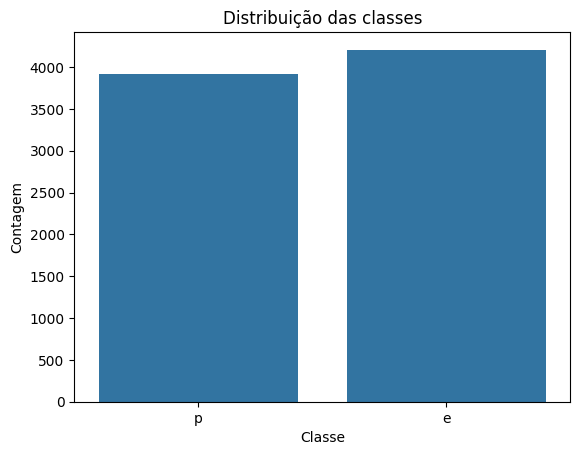

In [ ]:
print(y.value_counts())    # Distribuição das classes alvo (edible ou poisonous)
sns.countplot(data=df, x='poisonous')
plt.title('Distribuição das classes')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.show()

In [ ]:
# Print dos valores da coluna stalk-root

print(df['stalk-root'].unique())


['e' 'c' 'b' 'r' nan]


# Pré-processamento (Victor)


In [ ]:
df = df.drop('stalk-root', axis=1)  # Contém valores faltantes
imputer = SimpleImputer(strategy='most_frequent')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [ ]:
mushroom_encoder = OneHotEncoder()

# Codificar variáveis categóricas (X)
X_encoded = mushroom_encoder.fit_transform(df_imputed.drop('poisonous', axis=1)).toarray()

# Codificar variável alvo (y)
label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(df_imputed['poisonous'])  # 'p'=1, 'e'=0
print("Categorias codificadas:\n", mushroom_encoder.categories_)
#X_encoded = X_encoded.toarray()

Categorias codificadas:
 [array(['b', 'c', 'f', 'k', 's', 'x'], dtype=object), array(['f', 'g', 's', 'y'], dtype=object), array(['b', 'c', 'e', 'g', 'n', 'p', 'r', 'u', 'w', 'y'], dtype=object), array(['f', 't'], dtype=object), array(['a', 'c', 'f', 'l', 'm', 'n', 'p', 's', 'y'], dtype=object), array(['a', 'f'], dtype=object), array(['c', 'w'], dtype=object), array(['b', 'n'], dtype=object), array(['b', 'e', 'g', 'h', 'k', 'n', 'o', 'p', 'r', 'u', 'w', 'y'],
      dtype=object), array(['e', 't'], dtype=object), array(['f', 'k', 's', 'y'], dtype=object), array(['f', 'k', 's', 'y'], dtype=object), array(['b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y'], dtype=object), array(['b', 'c', 'e', 'g', 'n', 'o', 'p', 'w', 'y'], dtype=object), array(['p'], dtype=object), array(['n', 'o', 'w', 'y'], dtype=object), array(['n', 'o', 't'], dtype=object), array(['e', 'f', 'l', 'n', 'p'], dtype=object), array(['b', 'h', 'k', 'n', 'o', 'r', 'u', 'w', 'y'], dtype=object), array(['a', 'c', 'n', 's', 'v', 'y']

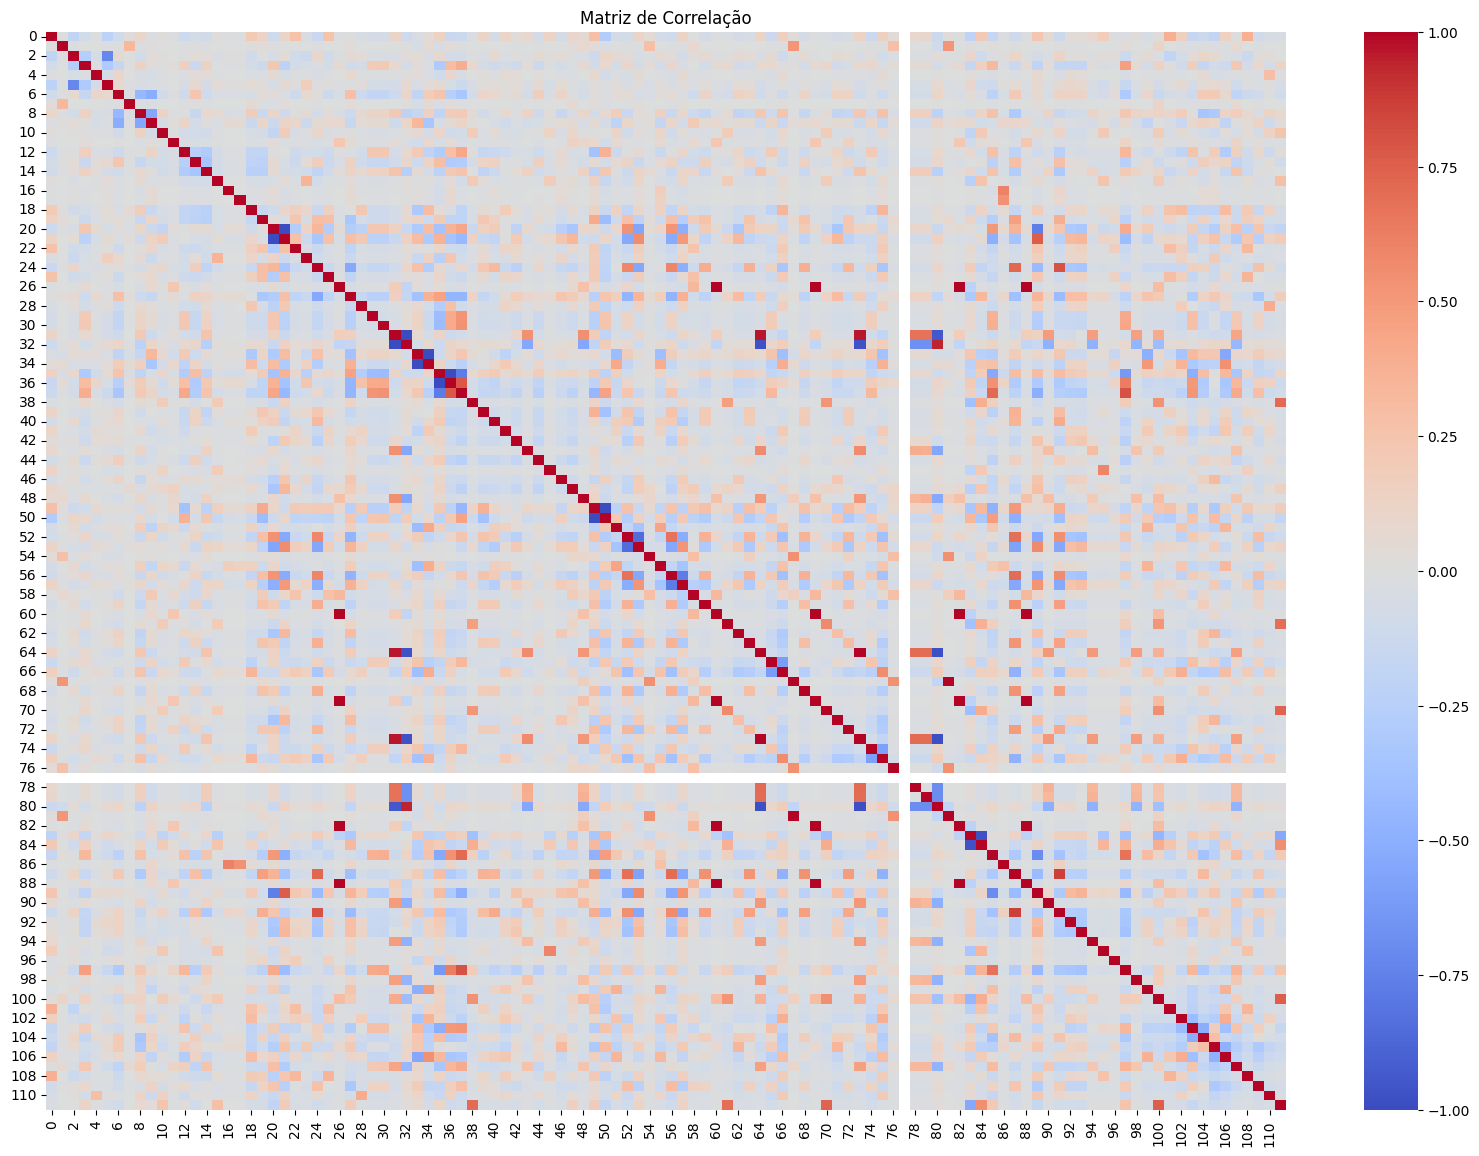

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, stratify=y_encoded, random_state=42)
# Converter X_train para DataFrame
X_train_df = pd.DataFrame(X_train)

# Matriz de correlação
plt.figure(figsize=(20, 14))
sns.heatmap(X_train_df.corr(), annot=False, cmap='coolwarm')
plt.title("Matriz de Correlação")
plt.show()

In [ ]:
# Verificar balanceamento das classes
print("Distribuição das classes (treino):", np.bincount(y_train))
print("Distribuição das classes (teste):", np.bincount(y_test))

Distribuição das classes (treino): [2945 2741]
Distribuição das classes (teste): [1263 1175]


# Modelos
Logistic Regression, Random Forest, Gradient Boosting

### REGRESSÃO LOGÍSTICA (Victor)





In [ ]:

log_reg_model = LogisticRegression(max_iter=1000, random_state=42)

# Validação cruzada
cv_scores_log_reg = cross_val_score(log_reg_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Acurácia média na validação cruzada (Regressão Logística): {cv_scores_log_reg.mean():.4f} ± {cv_scores_log_reg.std():.4f}")

# Treinamento do modelo
log_reg_model.fit(X_train, y_train)

# Previsões binárias e probabilidades
y_pred_log_reg = log_reg_model.predict(X_test)       # Previsões binárias (0 ou 1)
y_prob_log_reg = log_reg_model.predict_proba(X_test)[:, 1]  # Probabilidades da classe positiva

Acurácia média na validação cruzada (Regressão Logística): 0.9995 ± 0.0007


In [ ]:
#Escalonamento standard
log_com_scaler_standard = Pipeline([
    ('scaler', StandardScaler()),
    ('log_reg', LogisticRegression(max_iter=1000, random_state=42))
])

# Validação cruzada
cv_scores_log_com_scaler = cross_val_score(log_com_scaler_standard, X_train, y_train, cv=5, scoring='accuracy')
print(f"Acurácia média na validação cruzada (Regressão Logística com escalonamento): {cv_scores_log_com_scaler.mean():.4f} ± {cv_scores_log_com_scaler.std():.4f}")

log_com_scaler_MinMax = Pipeline([
    ('scaler', MinMaxScaler()),
    ('log_reg', LogisticRegression(max_iter=1000, random_state=42))
])

#Validação cruzada
cs_scores_com_scaler_MinMax = cross_val_score(log_com_scaler_MinMax, X_train, y_train, cv=5, scoring='accuracy')
print(f"Acurácia média na validação cruzada (Regressão Logística com escalonamento MinMax): {cs_scores_com_scaler_MinMax.mean():.4f} ± {cs_scores_com_scaler_MinMax.std():.4f}")


Acurácia média na validação cruzada (Regressão Logística com escalonamento): 0.9998 ± 0.0004
Acurácia média na validação cruzada (Regressão Logística com escalonamento MinMax): 0.9995 ± 0.0007


In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'max_iter': [100, 500, 1000]
}

grid_search_lr = GridSearchCV(log_reg_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train, y_train)

print("Melhores parâmetros encontrados:")
print(grid_search_lr.best_params_)

Melhores parâmetros encontrados:
{'C': 10, 'max_iter': 100, 'solver': 'liblinear'}


In [ ]:
print("\nMelhores parâmetros encontrados:")
print(grid_search_lr.best_params_)

# Melhor modelo
best_lr = grid_search_lr.best_estimator_
best_lr.fit(X_train, y_train)  # Treine novamente com os melhores parâmetros
y_pred_lr_best = best_lr.predict(X_test)
y_prob_lr_best = best_lr.predict_proba(X_test)[:, 1]

print("\nResultados com o melhor modelo:")
print("Acurácia:", accuracy_score(y_test, y_pred_lr_best))
print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred_lr_best))


Melhores parâmetros encontrados:
{'C': 10, 'max_iter': 100, 'solver': 'liblinear'}

Resultados com o melhor modelo:
Acurácia: 1.0

Relatório de classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



## GRADIENT BOOSTING (Franciel)

In [ ]:
gb_model = GradientBoostingClassifier(
    n_estimators=100,      # Número de árvores
    learning_rate=0.1,     # Taxa de aprendizado
    max_depth=3,           # Profundidade máxima das árvores
    min_samples_split=5,   # Mínimo de amostras para dividir um nó
    min_samples_leaf=2,    # Mínimo de amostras em cada folha
    subsample=0.8,         # Fração de amostras para cada árvore (< 1.0 ajuda a evitar overfitting)
    max_features='sqrt',   # Número de features a considerar em cada divisão
    random_state=42        # Para reprodutibilidade
)

# Validação cruzada no conjunto de treinamento
cv_scores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Acurácia média na validação cruzada: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Treinar o modelo com todos os dados de treinamento
gb_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = gb_model.predict(X_test)
y_prob = gb_model.predict_proba(X_test)[:, 1]  # Probabilidades da classe positiva


Acurácia média na validação cruzada: 0.9996 ± 0.0004


In [ ]:
# Sem escalonamento
modelo_sem_scaling = GradientBoostingClassifier(random_state=42)
cv_scores_sem = cross_val_score(modelo_sem_scaling, X_train, y_train, cv=5, scoring='accuracy')

# Com escalonamento
pipeline_com_scaling = Pipeline([
    ('scaler', StandardScaler()),
    ('gb', GradientBoostingClassifier(random_state=42))
])
cv_scores_com = cross_val_score(pipeline_com_scaling, X_train, y_train, cv=5, scoring='accuracy')

print("\nComparação com e sem escalonamento:")
print(f"Sem escalonamento: {cv_scores_sem.mean():.4f} ± {cv_scores_sem.std():.4f}")
print(f"Com escalonamento: {cv_scores_com.mean():.4f} ± {cv_scores_com.std():.4f}")



Comparação com e sem escalonamento:
Sem escalonamento: 0.9998 ± 0.0004
Com escalonamento: 0.9998 ± 0.0004


O modelo Gradient Boosting apresentou desempenho idêntico com e sem o uso de escalonamento dos dados, confirmando que algoritmos baseados em árvores não são sensíveis à escala das variáveis. Portanto, a etapa de normalização não é necessária nesse contexto.

In [ ]:
param_grid = {
    'n_estimators': [100, 200],           # número de árvores
    'learning_rate': [0.05, 0.1],         # taxa de aprendizado
    'max_depth': [2, 3],                  # profundidade das árvores
    'min_samples_leaf': [1, 4],           # mínimo de amostras na folha
    'max_features': ['sqrt', 'log2']      # quantidade de atributos considerados por divisão
}

print("\nIniciando otimização de hiperparâmetros (pode demorar)...")
grid_search = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,  # Usar todos os núcleos disponíveis
    verbose=1
)

grid_search.fit(X_train, y_train)

print("\nMelhores parâmetros encontrados:")
print(grid_search.best_params_)


Iniciando otimização de hiperparâmetros (pode demorar)...
Fitting 5 folds for each of 32 candidates, totalling 160 fits

Melhores parâmetros encontrados:
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 200}


In [ ]:
print("\nMelhores parâmetros encontrados:")
print(grid_search.best_params_)

# Avaliar o melhor modelo
best_model_gb = grid_search.best_estimator_
best_model_gb.fit(X_train, y_train)  # Treine novamente com os melhores parâmetros
y_pred_best = best_model_gb.predict(X_test)

print("\nResultados com o melhor modelo:")
print("Acurácia:", accuracy_score(y_test, y_pred_best))
print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred_best))


Melhores parâmetros encontrados:
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'n_estimators': 200}

Resultados com o melhor modelo:
Acurácia: 1.0

Relatório de classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



## RANDOM FOREST (Yagho)

In [ ]:
# Instanciação do modelo
rf = RandomForestClassifier(
    n_estimators=25,       # Quantidade de árvores na floresta
    max_depth=None,        # Profundidade máxima das árvores
    min_samples_split=2,   # Mínimo de amostras para dividir um nó
    min_samples_leaf=1,    # Mínimo de amostras em cada folha
    max_features='sqrt',   # Máximo de features consideradas em cada divisão
    random_state=42        # Reprodutibilidade
)

# Validação cruzada
cv_score_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Acurácia média na validação cruzada (Random Forest): {cv_score_rf.mean():.4f} ± {cv_score_rf.std():.4f}")

# Treinamento do modelo
rf.fit(X_train, y_train)

# Previsões
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

Acurácia média na validação cruzada (Random Forest): 1.0000 ± 0.0000


Acurácia máxima, o que pode sugerir overfitting, mas é mais provável que as features estejam separando muito bem as classes. O Random Forest é um modelo robusto e o dataset apresenta variáveis altamente discriminativas. O número de árvores foi mantido relativamente baixo porque, mesmo assim, o modelo já atinge boa performance com custo computacional reduzido.

In [ ]:
rf_sem_scaling = RandomForestClassifier(random_state=42)
cv_scores_sem = cross_val_score(rf_sem_scaling, X_train, y_train, cv=5, scoring='accuracy')

pipeline_rf_com_scaling = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])
cv_scores_com = cross_val_score(pipeline_rf_com_scaling, X_train, y_train, cv=5, scoring='accuracy')

print("\nComparação Random Forest com e sem escalonamento:")
print(f"Sem escalonamento: {cv_scores_sem.mean():.4f} ± {cv_scores_sem.std():.4f}")
print(f"Com escalonamento : {cv_scores_com.mean():.4f} ± {cv_scores_com.std():.4f}")


Comparação Random Forest com e sem escalonamento:
Sem escalonamento: 1.0000 ± 0.0000
Com escalonamento : 1.0000 ± 0.0000


Assim como o Gradient Boosting, o Random Forest não possui mudanças independentemente do uso de escalonamento.

In [ ]:
# Otimização de hiperparametros com a utilização do GridSearchCV

param_grid_rf = {
    'n_estimators': [5, 10, 25, 50],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(X_train, y_train)

print("\nMelhores parâmetros encontrados (Random Forest):")
print(grid_search_rf.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits

Melhores parâmetros encontrados (Random Forest):
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}


In [ ]:
print("\nMelhores parâmetros encontrados (Random Forest):")
print(grid_search_rf.best_params_)

# Melhor modelo
best_rf = grid_search_rf.best_estimator_
y_pred_rf_best = best_rf.predict(X_test)
y_prob_rf_best = best_rf.predict_proba(X_test)[:, 1]

# Avaliação de melhor modelo
print("\nResultados com o melhor modelo:")
print("Acurácia:", accuracy_score(y_test, y_pred_rf_best))
print("\nRelatório de classificação:")
print(classification_report(y_test, y_pred_rf_best))


Melhores parâmetros encontrados (Random Forest):
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}

Resultados com o melhor modelo:
Acurácia: 1.0

Relatório de classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1263
           1       1.00      1.00      1.00      1175

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



# Avaliação dos resultados através de pelo menos 4 métricas sobre o conjunto de treino e de teste.

### Avaliação da Regressão Logistica (Victor)

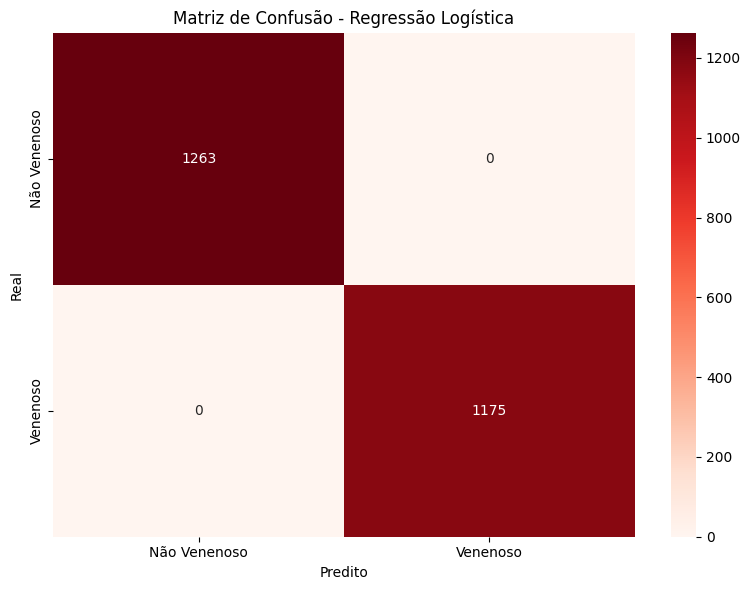

In [ ]:
# Matriz de confusão
plt.figure(figsize=(8, 6))
cm_lr = confusion_matrix(y_test, y_pred_lr_best)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Reds',
            xticklabels=['Não Venenoso', 'Venenoso'],
            yticklabels=['Não Venenoso', 'Venenoso'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - Regressão Logística')
plt.tight_layout()
plt.show()

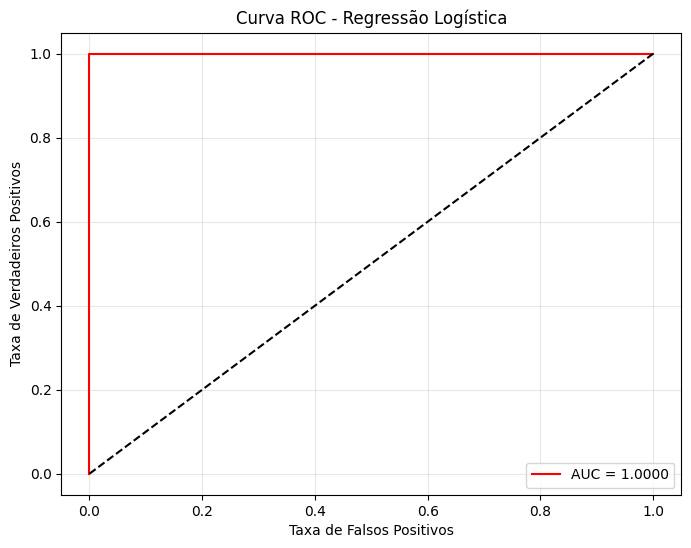

In [ ]:
# Curva ROC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr_best)
roc_auc_lr = roc_auc_score(y_test, y_prob_lr_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'AUC = {roc_auc_lr:.4f}', color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC - Regressão Logística')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Avaliação no conjunto de treino com o melhor modelo
y_train_pred_lr = best_lr.predict(X_train)
y_train_prob_lr = best_lr.predict_proba(X_train)[:, 1]

print("\n--- MÉTRICAS NO CONJUNTO DE TREINO (Regressão Logística) ---")
print("Acurácia:", accuracy_score(y_train, y_train_pred_lr))
print("Precisão:", precision_score(y_train, y_train_pred_lr))
print("Recall:", recall_score(y_train, y_train_pred_lr))
print("F1-score:", f1_score(y_train, y_train_pred_lr))
print("ROC AUC:", roc_auc_score(y_train, y_train_prob_lr))

print("\n--- MÉTRICAS NO CONJUNTO DE TESTE (Regressão Logística) ---")
print("Acurácia:", accuracy_score(y_test, y_pred_lr_best))
print("Precisão:", precision_score(y_test, y_pred_lr_best))
print("Recall:", recall_score(y_test, y_pred_lr_best))
print("F1-score:", f1_score(y_test, y_pred_lr_best))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr_best))


--- MÉTRICAS NO CONJUNTO DE TREINO (Regressão Logística) ---
Acurácia: 1.0
Precisão: 1.0
Recall: 1.0
F1-score: 1.0
ROC AUC: 1.0

--- MÉTRICAS NO CONJUNTO DE TESTE (Regressão Logística) ---
Acurácia: 1.0
Precisão: 1.0
Recall: 1.0
F1-score: 1.0
ROC AUC: 1.0


## Avaliação do Gradient Boosting (Franciel)

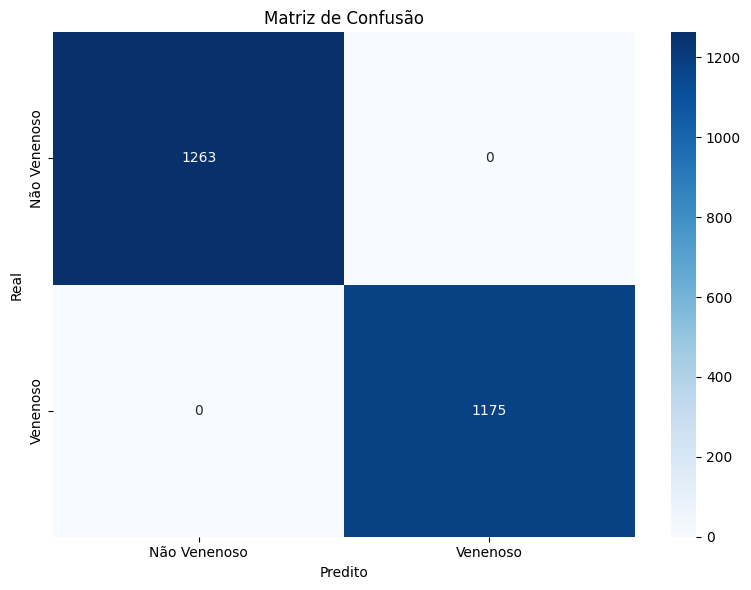

In [ ]:
# Matriz de confusão
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Não Venenoso', 'Venenoso'],
            yticklabels=['Não Venenoso', 'Venenoso'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.tight_layout()
plt.show()

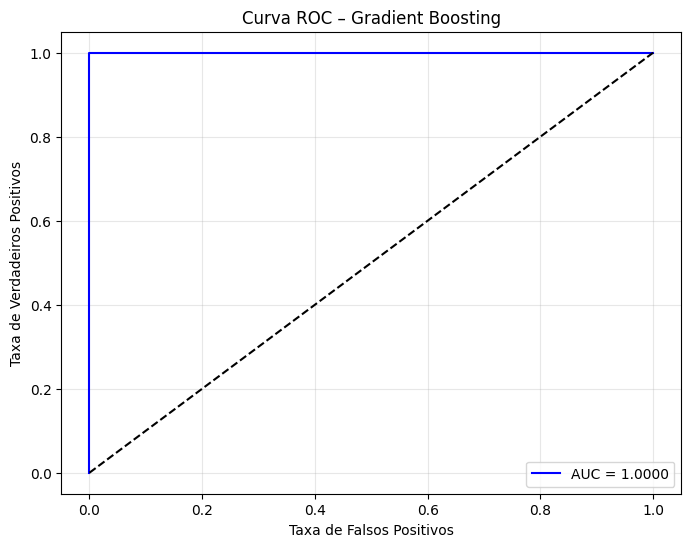

In [ ]:
# Gerar as probabilidades da classe positiva
y_prob_gb_best = best_model_gb.predict_proba(X_test)[:, 1]

# Calcular os pontos da curva ROC e a AUC
fpr_gb, tpr_gb, _ = roc_curve(y_test, y_prob_gb_best)
roc_auc_gb = roc_auc_score(y_test, y_prob_gb_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, label=f'AUC = {roc_auc_gb:.4f}', color='blue')
plt.plot([0, 1], [0, 1], 'k--')  # linha base aleatória
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC – Gradient Boosting')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Avaliar no conjunto de treino (usando o modelo final)
y_train_pred = best_model_gb.predict(X_train)
y_train_prob = best_model_gb.predict_proba(X_train)[:, 1]

print("\n--- MÉTRICAS NO CONJUNTO DE TREINO ---")
print("Acurácia:", accuracy_score(y_train, y_train_pred))
print("Precisão:", precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("F1-score:", f1_score(y_train, y_train_pred))
print("ROC AUC:", roc_auc_score(y_train, y_train_prob))

print("\n--- MÉTRICAS NO CONJUNTO DE TESTE ---")
print("Acurácia:", accuracy_score(y_test, y_pred_best))
print("Precisão:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1-score:", f1_score(y_test, y_pred_best))
print("ROC AUC:", roc_auc_score(y_test, best_model_gb.predict_proba(X_test)[:, 1]))


--- MÉTRICAS NO CONJUNTO DE TREINO ---
Acurácia: 1.0
Precisão: 1.0
Recall: 1.0
F1-score: 1.0
ROC AUC: 1.0

--- MÉTRICAS NO CONJUNTO DE TESTE ---
Acurácia: 1.0
Precisão: 1.0
Recall: 1.0
F1-score: 1.0
ROC AUC: 1.0


## Avaliação do Random Forest (Yagho)

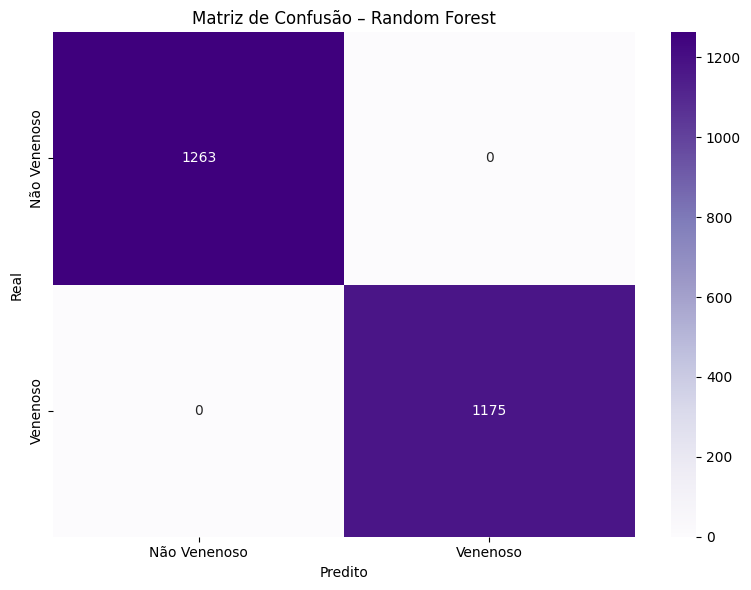

In [ ]:
# Matriz de confusão

plt.figure(figsize=(8, 6))
cm_rf = confusion_matrix(y_test, y_pred_rf_best)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Não Venenoso', 'Venenoso'],
            yticklabels=['Não Venenoso', 'Venenoso'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão – Random Forest')
plt.tight_layout()
plt.show()

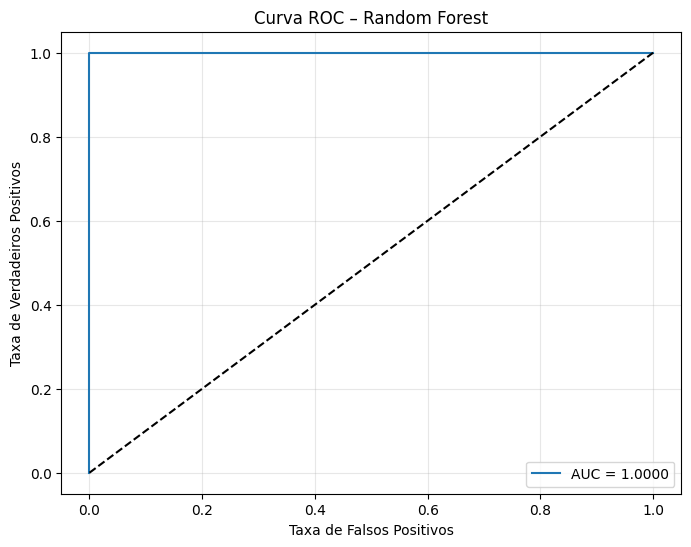

In [ ]:
# Curva ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf_best)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf_best)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label=f'AUC = {roc_auc_rf:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC – Random Forest')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Avaliação no conjunto de treino com modelo final
y_train_pred_rf = best_rf.predict(X_train)
y_train_prob_rf = best_rf.predict_proba(X_train)[:, 1]

print("\n--- MÉTRICAS NO CONJUNTO DE TREINO (Random Forest) ---")
print("Acurácia:", accuracy_score(y_train, y_train_pred_rf))
print("Precisão:", precision_score(y_train, y_train_pred_rf))
print("Recall:", recall_score(y_train, y_train_pred_rf))
print("F1-score:", f1_score(y_train, y_train_pred_rf))
print("ROC AUC:", roc_auc_score(y_train, y_train_prob_rf))

print("\n--- MÉTRICAS NO CONJUNTO DE TESTE (Random Forest) ---")
print("Acurácia:", accuracy_score(y_test, y_pred_rf_best))
print("Precisão:", precision_score(y_test, y_pred_rf_best))
print("Recall:", recall_score(y_test, y_pred_rf_best))
print("F1-score:", f1_score(y_test, y_pred_rf_best))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf_best))


--- MÉTRICAS NO CONJUNTO DE TREINO (Random Forest) ---
Acurácia: 1.0
Precisão: 1.0
Recall: 1.0
F1-score: 1.0
ROC AUC: 1.0

--- MÉTRICAS NO CONJUNTO DE TESTE (Random Forest) ---
Acurácia: 1.0
Precisão: 1.0
Recall: 1.0
F1-score: 1.0
ROC AUC: 1.0


# Apresentação dos resultados através de tabela e gráfico de barras

## Regressão Logística (Victor)

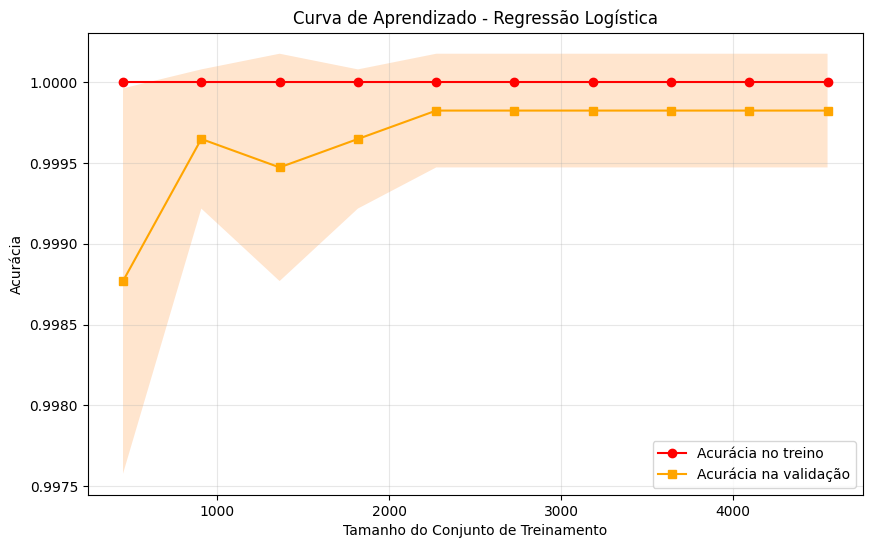

In [ ]:
# Curva de aprendizado
train_sizes_lr, train_scores_lr, test_scores_lr = learning_curve(
    best_lr, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy', n_jobs=-1)

train_mean_lr = np.mean(train_scores_lr, axis=1)
train_std_lr = np.std(train_scores_lr, axis=1)
test_mean_lr = np.mean(test_scores_lr, axis=1)
test_std_lr = np.std(test_scores_lr, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes_lr, train_mean_lr, label='Acurácia no treino', marker='o', color='red')
plt.fill_between(train_sizes_lr, train_mean_lr - train_std_lr, train_mean_lr + train_std_lr, alpha=0.2)
plt.plot(train_sizes_lr, test_mean_lr, label='Acurácia na validação', marker='s', color='orange')
plt.fill_between(train_sizes_lr, test_mean_lr - test_std_lr, test_mean_lr + test_std_lr, alpha=0.2)
plt.title('Curva de Aprendizado - Regressão Logística')
plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Acurácia')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Tabela de métricas
metrics_lr_df = pd.DataFrame({
    'Métrica': ['Acurácia', 'Precisão', 'Recall', 'F1-score', 'ROC AUC'],
    'Treino': [
        accuracy_score(y_train, y_train_pred_lr),
        precision_score(y_train, y_train_pred_lr),
        recall_score(y_train, y_train_pred_lr),
        f1_score(y_train, y_train_pred_lr),
        roc_auc_score(y_train, y_train_prob_lr)
    ],
    'Teste': [
        accuracy_score(y_test, y_pred_lr_best),
        precision_score(y_test, y_pred_lr_best),
        recall_score(y_test, y_pred_lr_best),
        f1_score(y_test, y_pred_lr_best),
        roc_auc_score(y_test, y_prob_lr_best)
    ]
})

print("\nTabela de Métricas - Regressão Logística:\n")
display(metrics_lr_df)


Tabela de Métricas - Regressão Logística:



,Métrica,Treino,Teste
0,Acurácia,1.0,1.0
1,Precisão,1.0,1.0
2,Recall,1.0,1.0
3,F1-score,1.0,1.0
4,ROC AUC,1.0,1.0


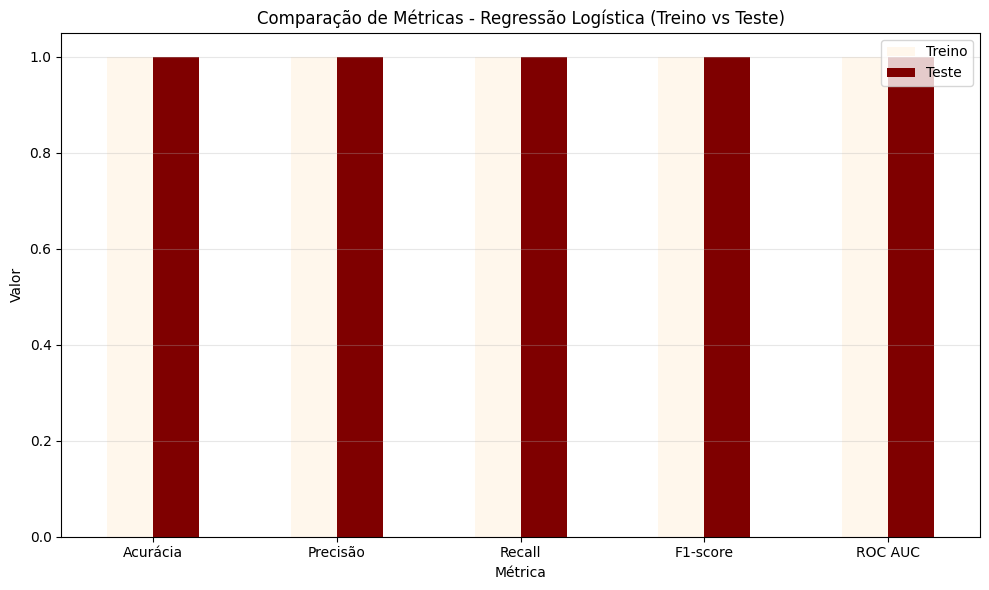

In [ ]:
metrics_lr_df.set_index('Métrica').plot(kind='bar', figsize=(10, 6), colormap='OrRd')
plt.title('Comparação de Métricas - Regressão Logística (Treino vs Teste)')
plt.ylabel('Valor')
plt.ylim(0, 1.05)
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Gradient Boosting (Franciel)

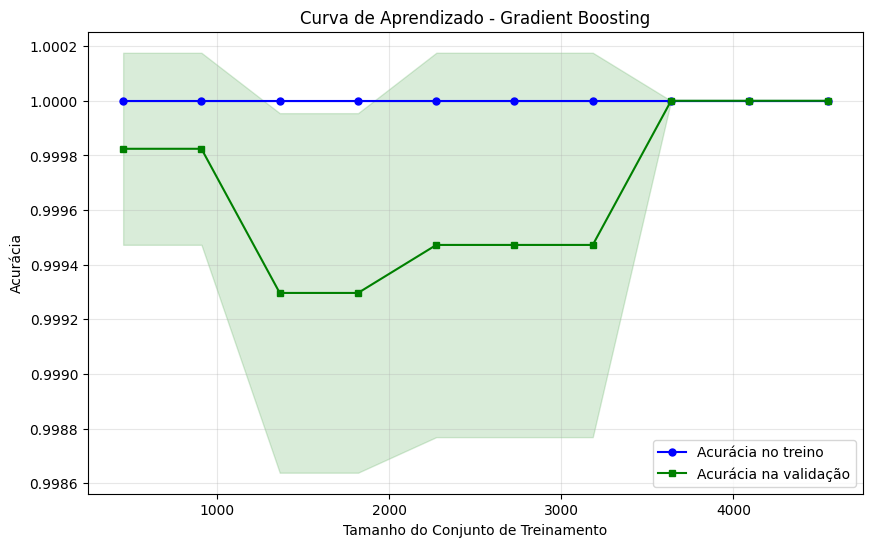

In [ ]:
# Exibir curvas de aprendizado para verificar overfitting/underfitting
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes, train_scores, test_scores = learning_curve(
    best_model_gb, X_train, y_train,
    train_sizes=train_sizes, cv=5,
    scoring='accuracy', n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Acurácia no treino')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='s', markersize=5, label='Acurácia na validação')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Curva de Aprendizado - Gradient Boosting')
plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Acurácia')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Criar DataFrame com os resultados
metrics_df = pd.DataFrame({
    'Métrica': ['Acurácia', 'Precisão', 'Recall', 'F1-score', 'ROC AUC'],
    'Treino': [
        accuracy_score(y_train, y_train_pred),
        precision_score(y_train, y_train_pred),
        recall_score(y_train, y_train_pred),
        f1_score(y_train, y_train_pred),
        roc_auc_score(y_train, y_train_prob)
    ],
    'Teste': [
        accuracy_score(y_test, y_pred_best),
        precision_score(y_test, y_pred_best),
        recall_score(y_test, y_pred_best),
        f1_score(y_test, y_pred_best),
        roc_auc_score(y_test, best_model_gb.predict_proba(X_test)[:, 1])
    ]
})

print("\nTabela de Métricas:\n")
display(metrics_df)


Tabela de Métricas:



,Métrica,Treino,Teste
0,Acurácia,1.0,1.0
1,Precisão,1.0,1.0
2,Recall,1.0,1.0
3,F1-score,1.0,1.0
4,ROC AUC,1.0,1.0


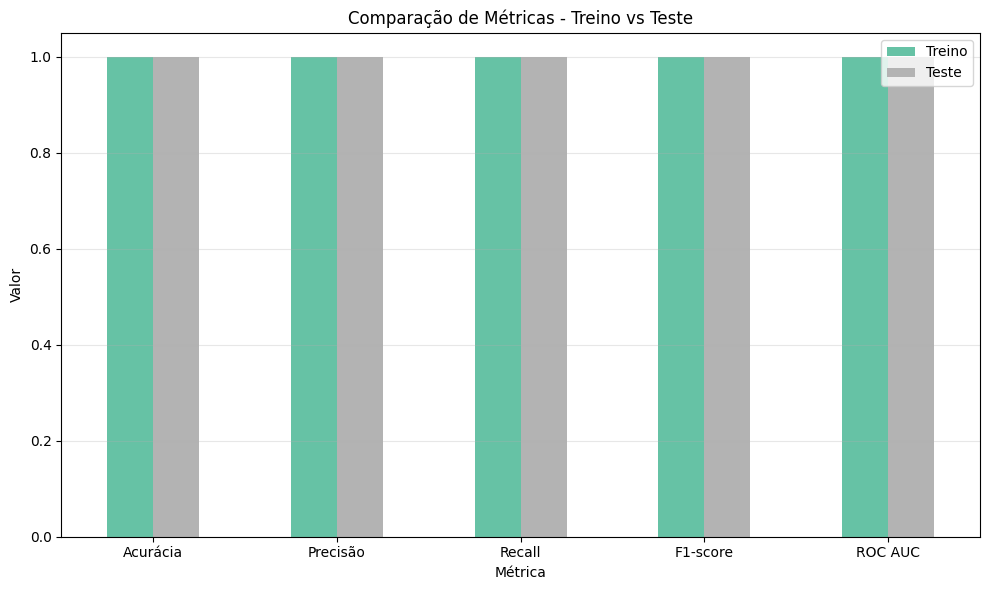

In [ ]:
# Gráfico de barras
metrics_df.set_index('Métrica').plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title('Comparação de Métricas - Treino vs Teste')
plt.ylabel('Valor')
plt.ylim(0, 1.05)
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Random Forest (Yagho)

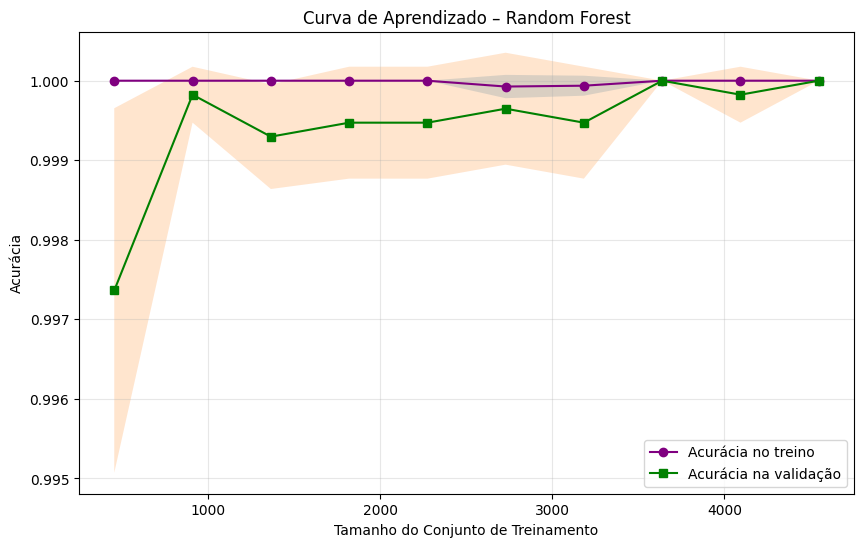

In [ ]:
train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(
    best_rf, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy', n_jobs=-1)

train_mean_rf = np.mean(train_scores_rf, axis=1)
train_std_rf = np.std(train_scores_rf, axis=1)
test_mean_rf = np.mean(test_scores_rf, axis=1)
test_std_rf = np.std(test_scores_rf, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes_rf, train_mean_rf, label='Acurácia no treino', marker='o', color='purple')
plt.fill_between(train_sizes_rf, train_mean_rf - train_std_rf, train_mean_rf + train_std_rf, alpha=0.2)
plt.plot(train_sizes_rf, test_mean_rf, label='Acurácia na validação', marker='s', color='green')
plt.fill_between(train_sizes_rf, test_mean_rf - test_std_rf, test_mean_rf + test_std_rf, alpha=0.2)
plt.title('Curva de Aprendizado – Random Forest')
plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Acurácia')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
metrics_rf_df = pd.DataFrame({
    'Métrica': ['Acurácia', 'Precisão', 'Recall', 'F1-score', 'ROC AUC'],
    'Treino': [
        accuracy_score(y_train, y_train_pred_rf),
        precision_score(y_train, y_train_pred_rf),
        recall_score(y_train, y_train_pred_rf),
        f1_score(y_train, y_train_pred_rf),
        roc_auc_score(y_train, y_train_prob_rf)
    ],
    'Teste': [
        accuracy_score(y_test, y_pred_rf_best),
        precision_score(y_test, y_pred_rf_best),
        recall_score(y_test, y_pred_rf_best),
        f1_score(y_test, y_pred_rf_best),
        roc_auc_score(y_test, y_prob_rf_best)
    ]
})

print("\nTabela de Métricas – Random Forest:\n")
display(metrics_rf_df)


Tabela de Métricas – Random Forest:



,Métrica,Treino,Teste
0,Acurácia,1.0,1.0
1,Precisão,1.0,1.0
2,Recall,1.0,1.0
3,F1-score,1.0,1.0
4,ROC AUC,1.0,1.0


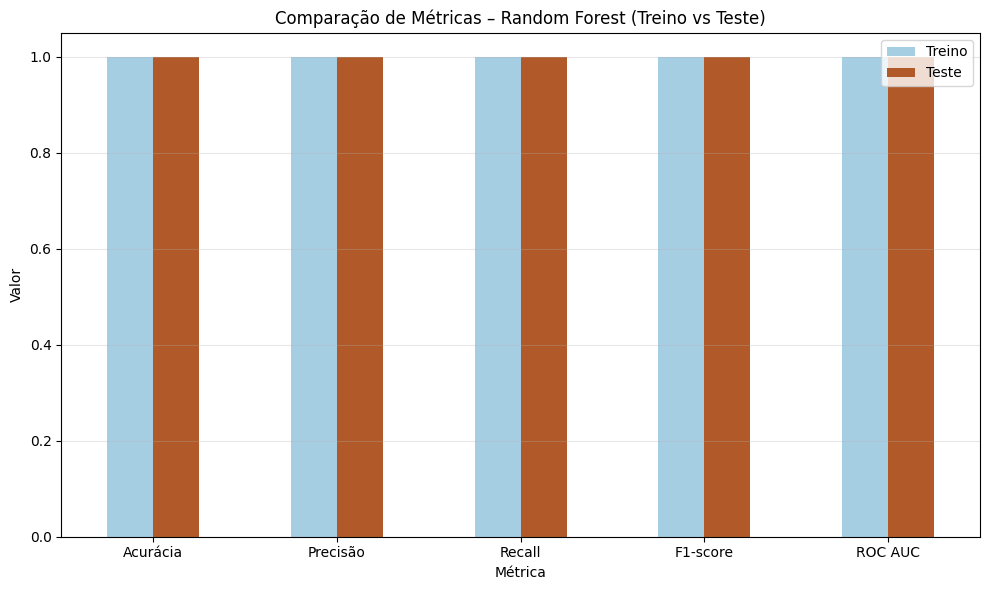

In [ ]:
# Gráfico de barras
metrics_rf_df.set_index('Métrica').plot(kind='bar', figsize=(10, 6), colormap='Paired')
plt.title('Comparação de Métricas – Random Forest (Treino vs Teste)')
plt.ylabel('Valor')
plt.ylim(0, 1.05)
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## Comparação dos Modelos (Yagho)


Comparação de Métricas entre os Modelos (Conjunto de Teste):



,Métrica,Regressão Logística,Gradient Boosting,Random Forest
0,Acurácia,1.0,1.0,1.0
1,Precisão,1.0,1.0,1.0
2,Recall,1.0,1.0,1.0
3,F1-score,1.0,1.0,1.0
4,ROC AUC,1.0,1.0,1.0


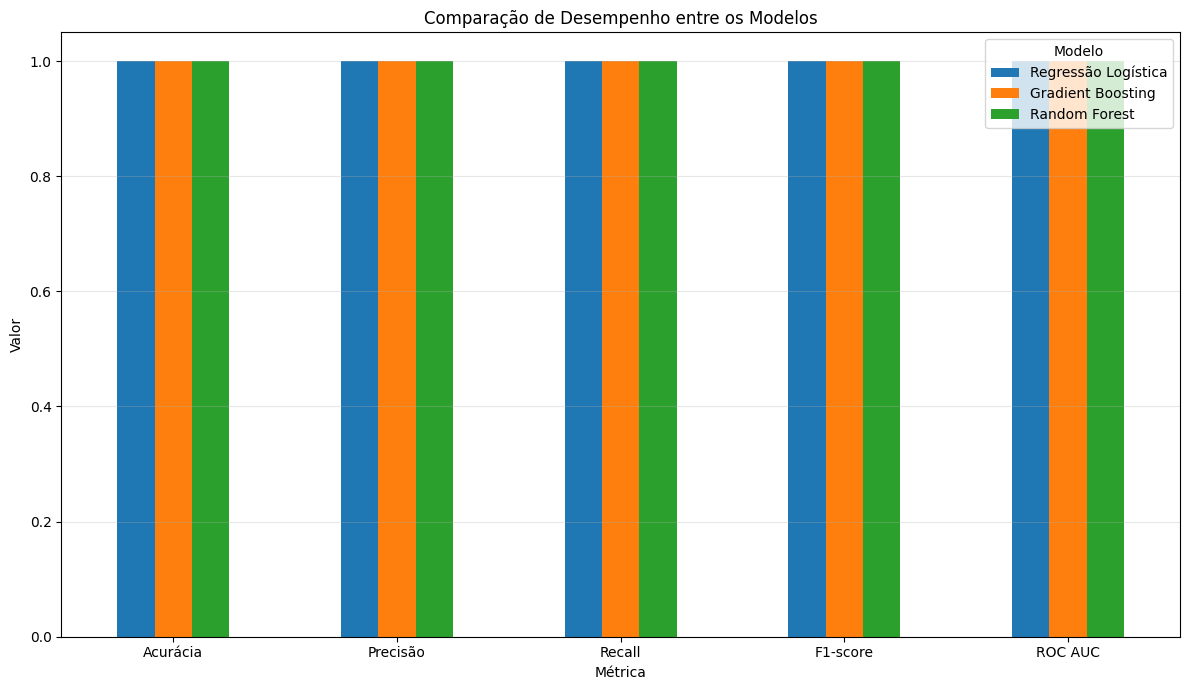

In [ ]:
"""### Comparação entre os três modelos (Regressão Logística, Gradient Boosting e Random Forest)"""

# Criar DataFrame com as métricas de teste dos três modelos
compare_df = pd.DataFrame({
    'Métrica': ['Acurácia', 'Precisão', 'Recall', 'F1-score', 'ROC AUC'],
    'Regressão Logística': [
        accuracy_score(y_test, y_pred_lr_best),
        precision_score(y_test, y_pred_lr_best),
        recall_score(y_test, y_pred_lr_best),
        f1_score(y_test, y_pred_lr_best),
        roc_auc_score(y_test, y_prob_lr_best)
    ],
    'Gradient Boosting': [
        accuracy_score(y_test, y_pred_best),
        precision_score(y_test, y_pred_best),
        recall_score(y_test, y_pred_best),
        f1_score(y_test, y_pred_best),
        roc_auc_score(y_test, best_model_gb.predict_proba(X_test)[:, 1])
    ],
    'Random Forest': [
        accuracy_score(y_test, y_pred_rf_best),
        precision_score(y_test, y_pred_rf_best),
        recall_score(y_test, y_pred_rf_best),
        f1_score(y_test, y_pred_rf_best),
        roc_auc_score(y_test, y_prob_rf_best)
    ]
})

print("\nComparação de Métricas entre os Modelos (Conjunto de Teste):\n")
display(compare_df)

# Gráfico de comparação entre os modelos
compare_df.set_index('Métrica').plot(kind='bar', figsize=(12, 7))
plt.title('Comparação de Desempenho entre os Modelos')
plt.ylabel('Valor')
plt.ylim(0, 1.05)
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=0)
plt.legend(title='Modelo')
plt.tight_layout()
plt.show()

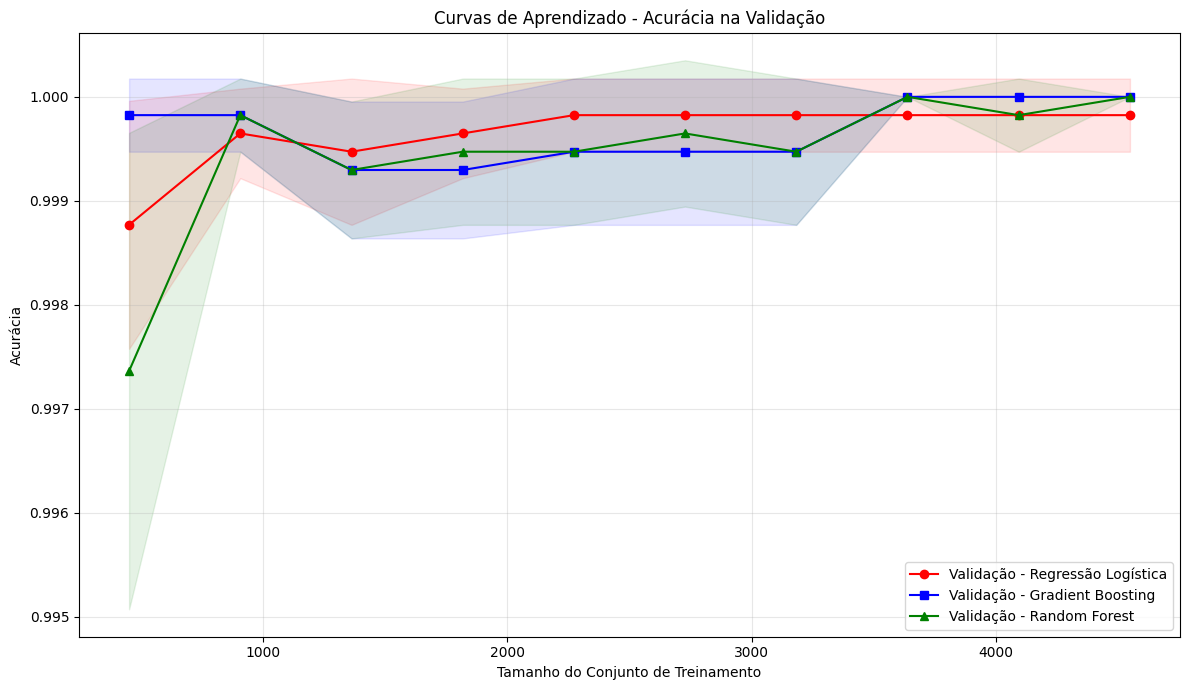

In [ ]:
plt.figure(figsize=(12, 7))

# Validação - Regressão Logística
plt.plot(train_sizes_lr, test_mean_lr, label='Validação - Regressão Logística', linestyle='-', marker='o', color='red')
plt.fill_between(train_sizes_lr, test_mean_lr - test_std_lr, test_mean_lr + test_std_lr, alpha=0.1, color='red')

# Validação - Gradient Boosting
plt.plot(train_sizes, test_mean, label='Validação - Gradient Boosting', linestyle='-', marker='s', color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='blue')

# Validação - Random Forest
plt.plot(train_sizes_rf, test_mean_rf, label='Validação - Random Forest', linestyle='-', marker='^', color='green')
plt.fill_between(train_sizes_rf, test_mean_rf - test_std_rf, test_mean_rf + test_std_rf, alpha=0.1, color='green')

plt.title('Curvas de Aprendizado - Acurácia na Validação')
plt.xlabel('Tamanho do Conjunto de Treinamento')
plt.ylabel('Acurácia')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


# EXTRA: Apresentação dos resultados com dados com Ruido (Yagho)


## Regressão Logística


In [ ]:
# Aplicar ruído ao conjunto de treino
X_train_noisy = X_train.copy()
X_train_noisy += np.random.normal(0, 0.3, X_train_noisy.shape)

# Definir modelo e grid de hiperparâmetros
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'max_iter': [100, 500, 1000]
}

# Ajuste com validação cruzada
grid_search_lr = GridSearchCV(log_reg_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_lr.fit(X_train_noisy, y_train)

print("Melhores parâmetros encontrados:", grid_search_lr.best_params_)
best_lr = grid_search_lr.best_estimator_

# Avaliação no conjunto de teste
y_pred = best_lr.predict(X_test)
y_prob = best_lr.predict_proba(X_test)[:, 1]

print("\n--- MÉTRICAS NO TESTE (Regressão Logística com ruído) ---")
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Precisão:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))

# Avaliação no treino com ruído
y_train_pred = best_lr.predict(X_train_noisy)
y_train_prob = best_lr.predict_proba(X_train_noisy)[:, 1]

print("\n--- MÉTRICAS NO TREINO (com ruído) ---")
print("Acurácia:", accuracy_score(y_train, y_train_pred))
print("Precisão:", precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("F1-score:", f1_score(y_train, y_train_pred))
print("ROC AUC:", roc_auc_score(y_train, y_train_prob))


Melhores parâmetros encontrados: {'C': 1, 'max_iter': 100, 'solver': 'liblinear'}

--- MÉTRICAS NO TESTE (Regressão Logística com ruído) ---
Acurácia: 0.9934372436423298
Precisão: 0.9957228400342173
Recall: 0.9906382978723405
F1-score: 0.9931740614334471
ROC AUC: 0.999371978234868

--- MÉTRICAS NO TREINO (com ruído) ---
Acurácia: 0.9755539922616954
Precisão: 0.9772560528246516
Recall: 0.9719080627508209
F1-score: 0.9745747210535943
ROC AUC: 0.9961054204871136


## Gradient Boosting

In [ ]:
    # Adicionar ruído ao conjunto de treino e ao conjunto de teste
    X_train_noisy_gb = X_train.copy() + np.random.normal(0, 0.3, X_train.shape)
    X_test_noisy_gb = X_test.copy() + np.random.normal(0, 0.3, X_test.shape)

    # Definir grid de hiperparâmetros para Gradient Boosting
    param_grid_gb = {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [2, 3],
        'min_samples_leaf': [1, 4],
        'max_features': ['sqrt', 'log2']
    }

    # GridSearch com validação cruzada usando treino com ruído
    print("\nIniciando otimização de hiperparâmetros para Gradient Boosting com ruído no treino (pode demorar)...")
    grid_search_gb = GridSearchCV(
        GradientBoostingClassifier(random_state=42),
        param_grid_gb,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1
    )
    grid_search_gb.fit(X_train_noisy_gb, y_train)

    print("\nMelhores parâmetros encontrados para Gradient Boosting:")
    print(grid_search_gb.best_params_)

    # Treinar o melhor modelo com treino com ruído
    best_model_gb = grid_search_gb.best_estimator_
    best_model_gb.fit(X_train_noisy_gb, y_train)

    # Previsões no conjunto de teste com ruído
    y_pred_test = best_model_gb.predict(X_test_noisy_gb)
    y_prob_test = best_model_gb.predict_proba(X_test_noisy_gb)[:, 1]

    # Previsões no conjunto de treino com ruído
    y_pred_train = best_model_gb.predict(X_train_noisy_gb)
    y_prob_train = best_model_gb.predict_proba(X_train_noisy_gb)[:, 1]

    # Métricas de avaliação no teste com ruído
    print("\n--- MÉTRICAS NO TESTE (Gradient Boosting com ruído) ---")
    print("Acurácia:", accuracy_score(y_test, y_pred_test))
    print("Precisão:", precision_score(y_test, y_pred_test))
    print("Recall:", recall_score(y_test, y_pred_test))
    print("F1-score:", f1_score(y_test, y_pred_test))
    print("ROC AUC:", roc_auc_score(y_test, y_prob_test))

    # Métricas de avaliação no treino com ruído
    print("\n--- MÉTRICAS NO TREINO (Gradient Boosting com ruído) ---")
    print("Acurácia:", accuracy_score(y_train, y_pred_train))
    print("Precisão:", precision_score(y_train, y_pred_train))
    print("Recall:", recall_score(y_train, y_pred_train))
    print("F1-score:", f1_score(y_train, y_pred_train))
    print("ROC AUC:", roc_auc_score(y_train, y_prob_train))



Iniciando otimização de hiperparâmetros para Gradient Boosting com ruído no treino (pode demorar)...
Fitting 5 folds for each of 32 candidates, totalling 160 fits

Melhores parâmetros encontrados para Gradient Boosting:
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 4, 'n_estimators': 200}

--- MÉTRICAS NO TESTE (Gradient Boosting com ruído) ---
Acurácia: 0.9934372436423298
Precisão: 0.9965724078834619
Recall: 0.9897872340425532
F1-score: 0.9931682322801024
ROC AUC: 0.9997816748370142

--- MÉTRICAS NO TREINO (Gradient Boosting com ruído) ---
Acurácia: 0.9991206472036581
Precisão: 1.0
Recall: 0.9981758482305728
F1-score: 0.9990870914734343
ROC AUC: 0.9999964074430348


## Random Forest

In [ ]:
# Aplicar ruído ao conjunto de treino
X_train_noisy_rf = X_train.copy()
X_train_noisy_rf += np.random.normal(0, 0.3, X_train_noisy_rf.shape)

# Definir modelo e grid de hiperparâmetros para Random Forest
rf_model = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [10, 25, 50],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

# Ajuste com validação cruzada
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rf.fit(X_train_noisy_rf, y_train)

print("Melhores parâmetros encontrados (Random Forest):", grid_search_rf.best_params_)
best_rf = grid_search_rf.best_estimator_

# Avaliação no conjunto de teste
y_pred_rf = best_rf.predict(X_test)
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]

print("\n--- MÉTRICAS NO TESTE (Random Forest com ruído) ---")
print("Acurácia:", accuracy_score(y_test, y_pred_rf))
print("Precisão:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))

# Avaliação no treino com ruído
y_train_pred_rf = best_rf.predict(X_train_noisy_rf)
y_train_prob_rf = best_rf.predict_proba(X_train_noisy_rf)[:, 1]

print("\n--- MÉTRICAS NO TREINO (Random Forest com ruído) ---")
print("Acurácia:", accuracy_score(y_train, y_train_pred_rf))
print("Precisão:", precision_score(y_train, y_train_pred_rf))
print("Recall:", recall_score(y_train, y_train_pred_rf))
print("F1-score:", f1_score(y_train, y_train_pred_rf))
print("ROC AUC:", roc_auc_score(y_train, y_train_prob_rf))


Melhores parâmetros encontrados (Random Forest): {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}

--- MÉTRICAS NO TESTE (Random Forest com ruído) ---
Acurácia: 0.9983593109105825
Precisão: 1.0
Recall: 0.9965957446808511
F1-score: 0.9982949701619779
ROC AUC: 1.0

--- MÉTRICAS NO TREINO (Random Forest com ruído) ---
Acurácia: 1.0
Precisão: 1.0
Recall: 1.0
F1-score: 1.0
ROC AUC: 0.9999999999999999


# Divisão de Tarefas:

1. Análise exploratória e pré-processamento: feito em conjunto pela tripla.

2. Aplicação de modelos, avaliação e visualização de métricas:

  2.1. Logistic Regression: Victor Soares;

  2.2. Gradient Boosting: Franciel Silveira;

  2.3. Random Forest: Yagho Miguel.

EXTRA: Experimento em dados ruidosos:
  1. Logistic Regression: Victor Soares;
  2. Gradient Boosting: Franciel Silveira;
  3. Random Forest: Yagho Miguel.